# <center>  Композиции алгоритмов, случайный лес</center>
## <center>  Случайный лес. Bagging</center>

### Ансамбли

Хорошим примером ансамблей считается теорема Кондорсе «о жюри присяжных» (1784). Если каждый член жюри присяжных имеет независимое мнение, и если вероятность правильного решения члена жюри больше 0.5, то тогда вероятность правильного решения присяжных в целом возрастает с увеличением количества членов жюри и стремится к единице. Если же вероятность быть правым у каждого из членов жюри меньше 0.5, то вероятность принятия правильного решения присяжными в целом монотонно уменьшается и стремится к нулю с увеличением количества присяжных. 
- $\large N $ — количество присяжных
- $\large p $ — вероятность правильного решения присяжного
- $\large \mu $ — вероятность правильного решения всего жюри
- $\large m $ — минимальное большинство членов жюри, $ m = floor(N/2) + 1 $
- $\large C_N^i$ — число [сочетаний](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%87%D0%B5%D1%82%D0%B0%D0%BD%D0%B8%D0%B5) из $N$ по $i$
$$ \large \mu = \sum_{i=m}^{N}C_N^ip^i(1-p)^{N-i} $$
Если $\large p > 0 $, то $\large \mu > p $
Если $\large N \rightarrow \infty $, то $\large \mu \rightarrow 1 $
<img src="../../img/bull.png" align="right" width=15% height=15%>

Давайте рассмотрим ещё один пример ансамблей — "Мудрость толпы". Фрэнсис Гальтон в 1906 году посетил рынок, где проводилась некая лотерея для крестьян. 
Их собралось около 800 человек и они пытались угадать вес быка, который стоял перед ними. Его вес составлял 1198 фунтов. Ни один крестьянин не угадал точный вес быка, но если посчитать среднее от их предсказаний, то получим 1197 фунтов.
Эту идею уменьшения ошибки применили и в машинном обучении.

### Бутстрэп

Bagging (от Bootstrap aggregation) — это один из первых и самых простых видов ансамблей. Он был придуман [Ле́о Бре́йманом](https://ru.wikipedia.org/wiki/Брейман,_Лео) в 1994 году. Бэггинг основан на статистическом методе бутстрэппинга, который позволяет оценивать многие статистики сложных моделей.

Метод бутстрэпа заключается в следующем. Пусть имеется выборка $\large X$ размера $\large N$. Равномерно возьмем из выборки $\large N$ объектов с возвращением. Это означает, что мы будем $\large N$ раз выбирать произвольный объект выборки (считаем, что каждый объект «достается» с одинаковой вероятностью $\large \frac{1}{N}$), причем каждый раз мы выбираем из всех исходных $\large N$ объектов. Можно представить себе мешок, из которого достают шарики: выбранный на каком-то шаге шарик возвращается обратно в мешок, и следующий выбор опять делается равновероятно из того же числа шариков. Отметим, что из-за возвращения среди них окажутся повторы. Обозначим новую выборку через $\large X_1$. Повторяя процедуру $\large M$ раз, сгенерируем $\large M$ подвыборок $\large X_1, \dots, X_M$. Теперь мы имеем достаточно большое число выборок и можем оценивать различные статистики исходного распределения.



### Бэггинг

Пусть имеется обучающая выборка $\large X$. С помощью бутстрэпа сгенерируем из неё выборки $\large X_1, \dots, X_M$. Теперь на каждой выборке обучим свой классификатор $\large a_i(x)$. Итоговый классификатор будет усреднять ответы всех этих алгоритмов (в случае классификации это соответствует голосованию): $\large a(x) = \frac{1}{M}\sum_{i = 1}^M a_i(x)$. Эту схему можно представить картинкой ниже.

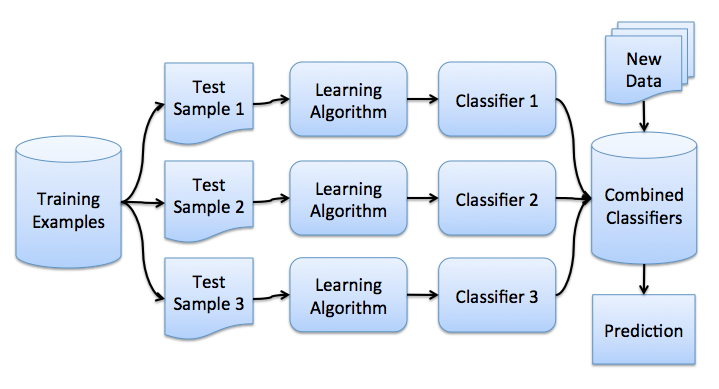<img src="../../img/bagging.png" alt="image"/>



Бэггинг позволяет снизить дисперсию (variance) обучаемого классификатора, уменьшая величину, на сколько ошибка будет отличаться, если обучать модель на разных наборах данных, или другими словами, предотвращает переобучение. Эффективность бэггинга достигается благодаря тому, что базовые алгоритмы, обученные по различным подвыборкам, получаются достаточно различными, и их ошибки взаимно компенсируются при голосовании, а также за счёт того, что объекты-выбросы могут не попадать в некоторые обучающие подвыборки.

В библиотеке `scikit-learn` есть реализация `BaggingRegressor` и `BaggingClassifier`, которая позволяет использовать большинство других алгоритмов "внутри". 

Бэггинг эффективен на малых выборках, когда исключение даже малой части обучающих объектов приводит к построению существенно различных базовых классификаторов. В случае больших выборок обычно генерируют подвыборки существенно меньшей длины.


### Out-of-bag error

При использовании случайных лесов нет необходимости в кросс-валидации или в отдельном тестовом наборе, чтобы получить несмещенную оценку ошибки набора тестов. Внутренняя оценка во время работы получается следующим образом:

Каждое дерево строится с использованием разных образцов бутстрэпа из исходных данных. Примерно 37% примеров остаются вне выборки бутстрэпа и не используется при построении k-го дерева.

Это можно легко доказать: пусть в выборке $\large \ell$ объектов. На каждом шаге все объекты попадают в подвыборку с возвращением равновероятно, т.е отдельный объект — с вероятностью  $\large\frac{1}{\ell}.$ Вероятность того, что объект НЕ попадет в подвыборку (т.е. его не взяли $\large \ell$ раз): $\large (1 - \frac{1}{\ell})^\ell$. При $\large \ell \rightarrow +\infty$ получаем один из "замечательных" пределов $\large \frac{1}{e}$. Тогда вероятность попадания конкретного объекта в подвыборку $\large \approx  1 - \frac{1}{e} \approx 63\%$.



 # Решающие деревья
Решающие деревья являются хорошим семейством базовых классификаторов для композиций, поскольку они достаточно сложны и могут достигать нулевой ошибки на любой выборке. Метод случайных подпространств позволяет снизить коррелированность между деревьями и избежать переобучения. Базовые алгоритмы обучаются на различных подмножествах признакового описания, которые также выделяются случайным образом.

Ансамбль моделей, использующих метод случайного подпространства, можно построить, используя следующий алгоритм:
1. Пусть количество объектов для тренировки равно $\large N$, а количество признаков $\large D$.
2. Выберите $\large L$ как число отдельных моделей в ансамбле.
3. Для каждой отдельной модели $\large l$ выберите $\large dl (dl < D) $ как число признаков для $\large l$ . Обычно для всех моделей используется только одно значение $\large dl$.
4. Для каждой отдельной модели $\large l$ создайте обучающую выборку, выбрав $\large dl$-признаков из $\large D$ с заменой и обучите модель.

Теперь, чтобы применить модель ансамбля к новому объекту, объедините результаты отдельных $\large L$ моделей мажоритарным голосованием или путем комбинирования апостериорных вероятностей.


### Алгоритм

Алгоритм построения случайного леса, состоящего из $\large N$ деревьев, выглядит следующим образом:
* Для каждого $\large n = 1, \dots, N$:
     * Сгенерировать выборку $\large X_n$ с помощью bootstrap.
     * Построить решающее дерево $\large b_n$ по выборке $\large X_n$:
         — по заданному критерию мы выбираем лучший признак, делаем разбиение в дереве по нему и так до исчерпания выборки
         — дерево строится, пока в каждом листе не более $\large n_\text{min}$ объектов или пока не достигнем определенной высоты дерева
         — при каждом разбиении сначала выбирается $\large m$ случайных признаков из $\large n$ исходных, 
         и оптимальное разделение выборки ищется только среди них.
         
Итоговый классификатор $\large a(x) = \frac{1}{N}\sum_{i = 1}^N b_i(x)$, простыми словами — для задачи кассификации мы выбираем решение голосованием по большинству, а в задаче регрессии — средним.

Рекомендуется в задачах классификации брать $\large m = \sqrt{n}$, а в задачах регрессии — $\large m = \frac{n}{3}$, где $\large n$ — число признаков. Также рекомендуется в задачах классификации строить каждое дерево до тех пор, пока в каждом листе не окажется по одному объекту, а в задачах регрессии — пока в каждом листе не окажется по пять объектов.




### Сравнение random forest с деревом решений и бэггингом

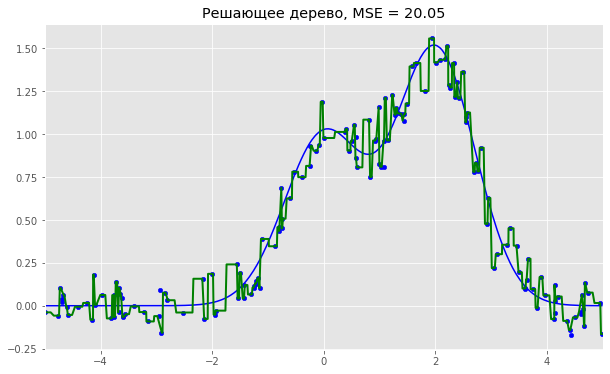

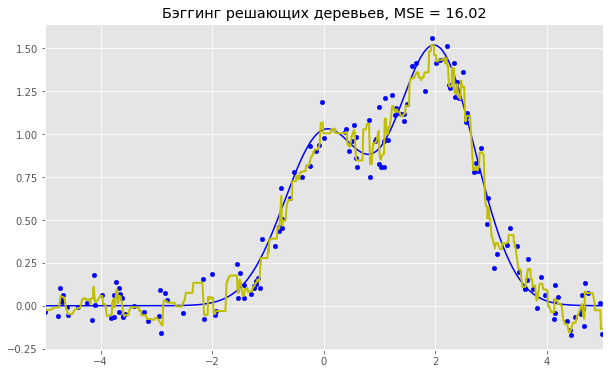

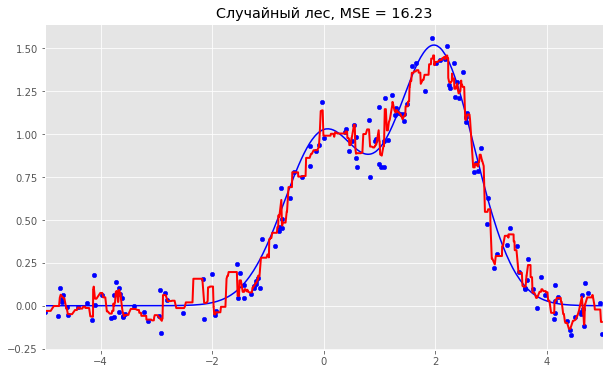

In [4]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

     
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

# One decision tree regressor
dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Решающее дерево, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

# Bagging decision tree regressor
bdt = BaggingRegressor(DecisionTreeRegressor()).fit(X_train, y_train)
bdt_predict = bdt.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, bdt_predict, "y", lw=2)
plt.xlim([-5, 5])
plt.title("Бэггинг решающих деревьев, MSE = %.2f" % np.sum((y_test - bdt_predict) ** 2));

# Random Forest
rf = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)
rf_predict = rf.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "r", lw=2)
plt.xlim([-5, 5])
plt.title("Случайный лес, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

Как мы видим из графиков и значений ошибки MSE, случайный лес из 10 деревьев дает лучший результат, чем одно дерево или бэггинг из 10 деревьев решений. Основное различие случайного леса и бэггинга на деревьях решений заключается в том, что в случайном лесе из случайного числа выбирается случайное подмножество признаков, и лучший признак для разделения узла определяется из подвыборки признаков, в отличие от бэггинга, где все функции рассматриваются для разделения в узле.

Также можно увидеть преимущество случайного леса и бэггинга в задачах классификации.



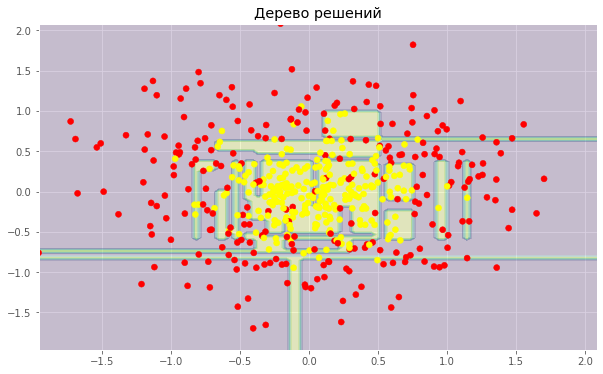

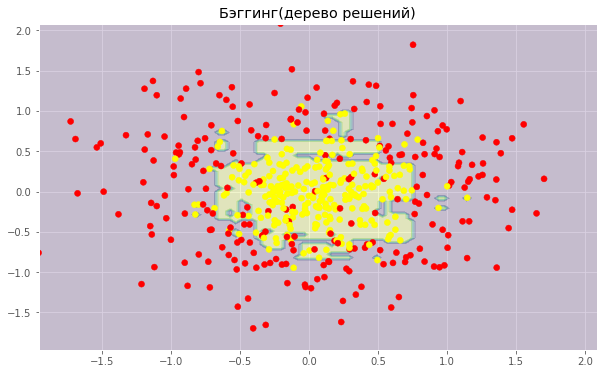

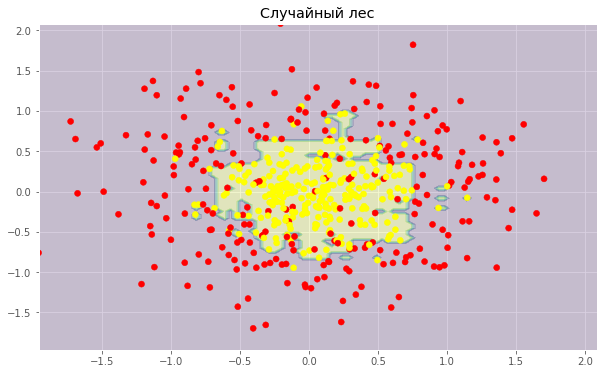

In [5]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X, y, test_size=0.2)

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Дерево решений")
plt.show()

b_dtree = BaggingClassifier(DecisionTreeClassifier(),n_estimators=300, random_state=42)
b_dtree.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = b_dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Бэггинг(дерево решений)")
plt.show()

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Случайный лес")
plt.show()

На рисунках выше видно, что разделяющая граница дерева решений очень «рваная» и на ней много острых углов, что говорит о переобучении и слабой обобщающей способности. В то время как у бэггинга и случайного леса граница достаточно сглаженная и практически нет признаков переобучения.

Давайте теперь попробуем разобраться с параметрами, с помощью подбора которых мы cможем увеличить долю правильных ответов.

### Параметры


Метод случайного леса реализован в библиотеке машинного обучения [scikit-learn](http://scikit-learn.org/stable/) двумя классами RandomForestClassifier и RandomForestRegressor.

Полный список параметров случайного леса для задачи регрессии:

```class sklearn.ensemble.RandomForestRegressor(
    n_estimators — число деревьев в "лесу" (по дефолту – 10)
    criterion — функция, которая измеряет качество разбиения ветки дерева (по дефолту — "mse" , так же можно выбрать "mae")
    max_features — число признаков, по которым ищется разбиение. Вы можете указать конкретное число или процент признаков, либо выбрать из доступных значений: "auto" (все признаки), "sqrt", "log2". По дефолту стоит "auto".
    max_depth — максимальная глубина дерева  (по дефолту глубина не ограничена)
    min_samples_split — минимальное количество объектов, необходимое для разделения внутреннего узла. Можно задать числом или процентом от общего числа объектов (по дефолту — 2)
    min_samples_leaf — минимальное число объектов в листе. Можно задать числом или процентом от общего числа объектов (по дефолту — 1)
    min_weight_fraction_leaf — минимальная взвешенная доля от общей суммы весов (всех входных объектов) должна быть в листе (по дефолту имеют одинаковый вес)
    max_leaf_nodes — максимальное количество листьев (по дефолту нет ограничения)
    min_impurity_split — порог для остановки наращивания дерева (по дефолту 1е-7)
    bootstrap — применять ли бустрэп для построения дерева (по дефолту True)
    oob_score — использовать ли out-of-bag объекты для оценки R^2 (по дефолту False)
    n_jobs — количество ядер для построения модели и предсказаний (по дефолту 1, если поставить -1, то будут использоваться все ядра)
    random_state — начальное значение для генерации случайных чисел (по дефолту его нет, если хотите воспроизводимые результаты, то нужно указать любое число типа int
    verbose — вывод логов по построению деревьев (по дефолту 0)
    warm_start — использует уже натренированую модель и добавляет деревьев в ансамбль (по дефолту False)
)```

Для задачи классификации все почти то же самое, мы приведем только те параметры, которыми RandomForestClassifier отличается от RandomForestRegressor 

```class sklearn.ensemble.RandomForestClassifier(
    criterion — поскольку у нас теперь задача классификации, то по дефолту выбран критерий "gini" (можно выбрать "entropy")
    class_weight — вес каждого класса (по дефолту все веса равны 1, но можно передать словарь с весами, либо явно указать "balanced", тогда веса классов будут равны их исходным частям в генеральной совокупности; также можно указать "balanced_subsample", тогда веса на каждой подвыборке будут меняться в зависимости от распределения классов на этой подвыборке.
```

# Пример

In [7]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split


In [15]:

%matplotlib inline
df=pd.read_csv(r"D:\GITHUB\DATA-ANALYSYS_2\Data\ORGANICS.csv",encoding="cp1251")

In [16]:
df.head(4)

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1


In [17]:
print(df.shape) 
print(df.info())

(22223, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None


In [18]:
df['TargetBuy'].replace([0,1],['No','Buy'],inplace=True)
df

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,No,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,No,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,Buy,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,Buy,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,No,0
5,2771,9.0,72.0,28.0,D,U,North,N West,Platinum,20759.81,3.0,No,0
6,3131,11.0,74.0,3.0,A,F,Midlands,East,Tin,0.01,8.0,No,0
7,3328,13.0,62.0,32.0,D,M,North,N East,Tin,0.01,5.0,No,0
8,4529,10.0,62.0,49.0,F,M,Midlands,East,Silver,2038.76,3.0,No,0
9,5886,14.0,43.0,49.0,F,F,NaN,NaN,Gold,6000.00,1.0,Buy,1


In [19]:
df1= df.drop(df.columns[[0,12]], axis=1)

In [20]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
df4 = df1.apply(lambda x: x.fillna(x.value_counts().index[0]))
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
DemAffl            22223 non-null float64
DemAge             22223 non-null float64
DemCluster         22223 non-null float64
DemClusterGroup    22223 non-null object
DemGender          22223 non-null object
DemReg             22223 non-null object
DemTVReg           22223 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           22223 non-null float64
TargetBuy          22223 non-null object
dtypes: float64(5), object(6)
memory usage: 1.9+ MB
None


In [21]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
df4['DemClusterGroup'] = le.fit_transform(df4['DemClusterGroup'])
df4['DemGender'] = le.fit_transform(df4['DemGender'])
df4['DemReg'] = le.fit_transform(df4['DemTVReg'])
df4['DemTVReg'] = le.fit_transform(df4['DemTVReg'])
df4['PromClass'] = le.fit_transform(df4['PromClass'])
df4['TargetBuy'] = le.fit_transform(df4['TargetBuy'])
#display the initial records
df4.head(20)

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,10.0,76.0,16.0,2,2,11,11,0,16000.00,4.0,1
1,4.0,49.0,35.0,3,2,11,11,0,6000.00,5.0,1
2,5.0,70.0,27.0,3,0,11,11,2,0.02,8.0,0
3,10.0,65.0,51.0,5,1,4,4,3,0.01,7.0,0
4,11.0,68.0,4.0,0,0,4,4,3,0.01,8.0,1
5,9.0,72.0,28.0,3,2,7,7,1,20759.81,3.0,1
6,11.0,74.0,3.0,0,0,2,2,3,0.01,8.0,1
7,13.0,62.0,32.0,3,1,5,5,3,0.01,5.0,1
8,10.0,62.0,49.0,5,1,2,2,2,2038.76,3.0,1
9,14.0,43.0,49.0,5,0,3,3,0,6000.00,1.0,0


In [22]:
x=df4.values[:, 0:10]
y=df4.values[::,10]
print(x)
print(y)



[[1.0e+01 7.6e+01 1.6e+01 ... 0.0e+00 1.6e+04 4.0e+00]
 [4.0e+00 4.9e+01 3.5e+01 ... 0.0e+00 6.0e+03 5.0e+00]
 [5.0e+00 7.0e+01 2.7e+01 ... 2.0e+00 2.0e-02 8.0e+00]
 ...
 [9.0e+00 7.0e+01 1.5e+01 ... 0.0e+00 6.0e+03 5.0e+00]
 [1.1e+01 6.6e+01 8.0e+00 ... 2.0e+00 5.0e+03 5.0e+00]
 [3.0e+00 7.5e+01 5.3e+01 ... 0.0e+00 6.0e+03 2.0e+00]]
[1. 1. 0. ... 1. 1. 1.]


In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 10)
from sklearn.tree import DecisionTreeClassifier

In [25]:
tree_entropy=DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [26]:
tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [28]:
tree_entropy.score(X_train, y_train)# результат на обучающей выборке


0.8094625867832348

In [29]:
tree_entropy.score(X_test,y_test)

0.808009599520024

In [30]:
from sklearn.metrics import roc_auc_score
y_pred = tree_entropy.predict(X_test)
# Рассчитываем roc auc
roc_value = roc_auc_score(y_test, y_pred)
roc_value

0.6636041627266623

In [32]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, tree_entropy.predict(X_test))
cnf_matrix

array([[ 616,  973],
       [ 307, 4771]], dtype=int64)

In [33]:
#tree_entropy.predict([[4.0,49.0,35.0, 6000.00,5.0]]) # прогноз
#число неправильно классифицированных объектов
y_pred = tree_entropy.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 1280


In [46]:

from sklearn.ensemble  import  RandomForestClassifier 
# Создаём модель леса из сотни деревьев
clf = RandomForestClassifier(n_estimators=100,  max_features = 'sqrt',max_depth=6, min_samples_split=2, random_state=42)
# Обучаем на тренировочных данных
clf.fit(X_train, y_train)
# Действующая классификация
y_pred = clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, clf.predict(X_test))) 

0.8126767806634096
0.8105594720263987
[[ 551 1038]
 [ 225 4853]]


In [44]:
#tree_entropy.predict([[4.0,49.0,35.0, 6000.00,5.0]]) # прогноз
#число неправильно классифицированных объектов
y_pred = clf.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 1263


In [45]:
from sklearn.metrics import roc_auc_score

# Рассчитываем roc auc
roc_value = roc_auc_score(y_test, y_pred)
roc_value

0.6512250924594576

<BarContainer object of 10 artists>

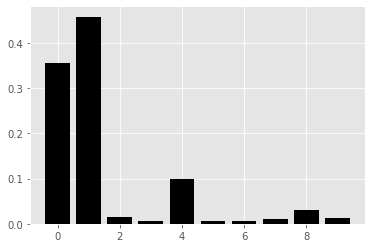

In [47]:

plt.bar(np.arange(len(clf.feature_importances_)), clf.feature_importances_,
color='black')

In [49]:
from sklearn.ensemble import BaggingClassifier
#bagging
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression

bag_model=BaggingClassifier(base_estimator=tree_entropy, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(X_train,y_train)
y_pred_bag=bag_model.predict(X_test)
print(bag_model.score(X_train, y_train))
print(bag_model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred_bag)) 

0.8151195680123425
0.8096595170241488
[[ 653  936]
 [ 333 4745]]


In [52]:
#tree_entropy.predict([[4.0,49.0,35.0, 6000.00,5.0]]) # прогноз
#число неправильно классифицированных объектов
y_pred = bag_model.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 1269


In [53]:
from sklearn.metrics import roc_auc_score

# Рассчитываем roc auc
roc_value = roc_auc_score(y_test, y_pred)
roc_value

0.6726866421892734

Далее рассмотрим несколько параметров, на которые в первую очередь стоит обратить внимание при построении модели:
- n_estimators — число деревьев в "лесу"
- criterion — критерий для разбиения выборки в вершине
- max_features — число признаков, по которым ищется разбиение
- min_samples_leaf — минимальное число объектов в листе
- max_depth — максимальная глубина дерева



**Рассмотрим применение случайного леса в другой задаче**

Для этого будем использовать пример с задачей ПРедсказание оттока клиентов. Это задача классификации, поэтому будем использовать метрику accuracy для оценки точности. Для начала построим самый простой классификатор. Возьмем только числовые признаки для упрощения.


In [3]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

# Загружаем данные
df = pd.read_csv("../../data/telecom_churn.csv")

# Выбираем сначала только колонки с числовым типом данных
cols = []
for i in df.columns:
    if (df[i].dtype == "float64") or (df[i].dtype == 'int64'):
        cols.append(i)
        
# Разделяем на признаки и объекты
X, y = df[cols].copy(), np.asarray(df["Churn"],dtype='int8')

# Инициализируем стратифицированную разбивку нашего датасета для валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Инициализируем наш классификатор с дефолтными параметрами
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

# Обучаем на тренировочном датасете
results = cross_val_score(rfc, X, y, cv=skf)

# Оцениваем точность на тестовом датасете
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 91.21%


Получили точность 91.21%, теперь попробуем улучшить этот результат и посмотреть, как ведут себя кривые обучения при изменении основных параметров.

Начнем с количества деревьев:

In [4]:
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.41% with 100 trees


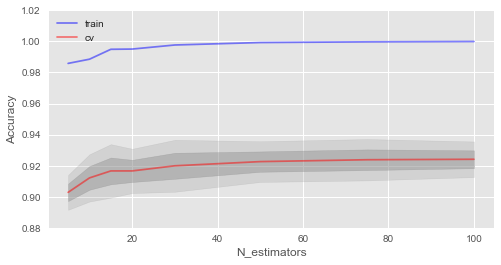

In [5]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators");

Как видно, при достижении определенного числа деревьев, наша точность на тесте выходит на асимптоту, и вы можете сами решить, сколько деревьев оптимально для вашей задачи. 
На рисунке также видно, что на тренировочной выборке мы смогли достичь 100% точности, это говорит нам о переобучении нашей модели. Чтобы избежать переобучения, мы должны добавить параметры регуляризации в модель.

Начнем с параметра максимальной глубины – `max_depth`. (зафиксируем к-во деревьев 100)

Best accuracy on CV is 92.65% with 15 max_depth


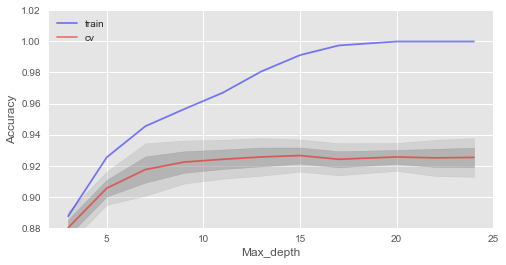

In [6]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Обучаем на тренировочном датасете
for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth");

Параметр `max_depth` хорошо справляется с регуляризацией модели, и мы уже не так сильно переобучаемся. Точность нашей модели немного возросла.

Еще важный параметр `min_samples_leaf`, он так же выполняет функцию регуляризатора.


In [7]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Обучаем на тренировочном датасете
for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.41% with 1 min_samples_leaf


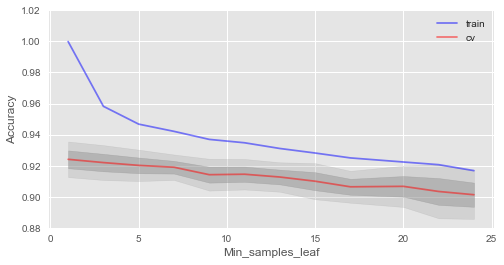

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf");

В данном случае мы не выигрываем в точности на валидации, но зато можем сильно уменьшить переобучение до 2% при сохранении точности около 92%.

Рассмотрим такой параметр как `max_features`. Для задач классификации по умолчанию используется $\large \sqrt{n}$, где n — число признаков. Давайте проверим, оптимально ли в нашем случае использовать 4 признака или нет.


Best accuracy on CV is 92.68% with 10 max_features


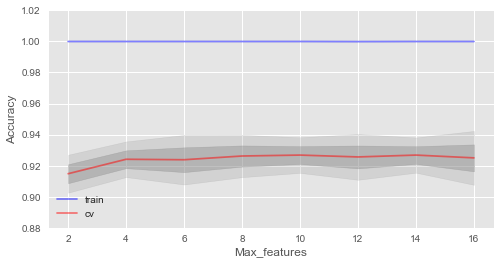

In [9]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]

# Обучаем на тренировочном датасете
for max_features in max_features_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, max_features=max_features)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_acc.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_features_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features");

В нашем случае оптимальное число признаков — 10, именно с таким значением достигается наилучший результат.

Мы рассмотрели, как ведут себя кривые обучения в зависимости от изменения основных параметров. Давайте теперь с помощью `GridSearch` найдем оптимальные параметры для нашего примера.


In [12]:
# Сделаем инициализацию параметров, по которым хотим сделать полный перебор
parameters = {'max_features': [4, 7, 10, 13], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [4, 7, 10, 13], 'max_depth': [5, 10, 15, 20], 'min_samples_leaf': [1, 3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [13]:
gcv.best_estimator_, gcv.best_score_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=15, max_features=7, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
             verbose=0, warm_start=False), 0.92829282928292833)

Лучшая точность, который мы смогли достичь с помощью перебора параметров — 92.83% при `'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 3`. 



###  Сверхслучайные деревья

В сверхслучайных деревьях (Extremely Randomized Trees) больше случайности в том, как вычисляются разделения в узлах. Как и в случайных лесах, используется случайное подмножество возможных признаков, но вместо поиска наиболее оптимальных порогов, пороговые значения произвольно выбираются для каждого возможного признака, и наилучший из этих случайно генерируемых порогов выбирается как лучшее правило для разделения узла. Это обычно позволяет немного уменьшить дисперсию модели за счет несколько большего увеличения смещения.

В библиотеке scikit-learn есть реализация [ExtraTreesClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier) и [ExtraTreesRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html#sklearn.ensemble.ExtraTreesRegressor). Данный метод стоит использовать, когда вы сильно переобучаетесь на случайном лесе или градиентном бустинге. 




**Плюсы**:
 - имеет высокую точность предсказания, на большинстве задач будет лучше линейных алгоритмов; точность сравнима с точностью бустинга
 - практически не чувствителен к выбросам в данных из-за случайного сэмлирования
 - нечувствителен к масштабированию (и вообще к любым монотонным преобразованиям) значений признаков, связано с выбором случайных подпространств
 - не требует тщательной настройки параметров, хорошо работает «из коробки». С помощью «тюнинга» параметров можно достичь прироста от 0.5 до 3% точности в зависимости от задачи и данных
 - способен эффективно обрабатывать данные с большим числом признаков и классов
 - одинаково хорошо обрабатывет как непрерывные, так и дискретные признаки
 - редко переобучается, на практике добавление деревьев почти всегда только улучшает композицию, но на валидации, после достижения определенного количества деревьев, кривая обучения выходит на асимптоту
 - для случайного леса существуют методы оценивания значимости отдельных признаков в модели
 - хорошо работает с пропущенными данными; сохраняет хорошую точность, если большая часть данных пропущенна
 - предполагает возможность сбалансировать вес каждого класса на всей выборке, либо на подвыборке каждого дерева
 - вычисляет близость между парами объектов, которые могут использоваться при кластеризации, обнаружении выбросов или (путем масштабирования) дают интересные представления данных
 - возможности, описанные выше, могут быть расширены до немаркированных данных, что приводит к возможноти делать кластеризацию и визуализацию данных, обнаруживать выбросы
 - высокая параллелизуемость и масштабируемость.
 
**Минусы**:
 - в отличие от одного дерева, результаты случайного леса сложнее интерпретировать
 - нет формальных выводов (p-values), доступных для оценки важности переменных
 - алгоритм работает хуже многих линейных методов, когда в выборке очень много разреженных признаков (тексты, Bag of words)
 - случайный лес не умеет экстраполировать, в отличие от той же линейной регрессии (но это можно считать и плюсом, так как не будет экстремальных значений в случае попадания выброса)
 - алгоритм склонен к переобучению на некоторых задачах, особенно на зашумленных данных
 - для данных, включающих категориальные переменные с различным количеством уровней, случайные леса предвзяты в пользу признаков с большим количеством уровней: когда у признака много уровней, дерево будет сильнее подстраиваться именно под эти признаки, так как на них можно получить более высокую точность
 - если данные содержат группы коррелированных признаков, имеющих схожую значимость для меток, то предпочтение отдается небольшим группам перед большими
 - больший размер получающихся моделей. Требуется $O(NK)$ памяти для хранения модели, где $K$ — число деревьев.

**Полезные источники:**
- 15 раздел книги “[Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)” Jerome H. Friedman, Robert Tibshirani, and Trevor Hastie
- [Блог](https://alexanderdyakonov.wordpress.com/2016/11/14/случайный-лес-random-forest/) Александра Дьяконова
- больше про практические применение случайного леса и других алгоритмов композиций в официальной документации [scikit-learn](http://scikit-learn.org/stable/modules/ensemble.html)
- [Курс](https://github.com/esokolov/ml-course-hse) Евгения Соколова по машинному обучению (материалы на GitHub). Есть дополнительные практические задания для углубления ваших знаний.

Задание:


1) Исследуйте зависимость тестовой ошибки от количества деревьев в ансамбле для алгоритма forest Random  на наборе данных Organics. Постройте график зависимости тестовой ошибки при числе деревьев, равном 1, 11, 21, . . . , 301, объясните полученные результаты. Получить графики зависимостей от других параметров моделей.


2)Исследуйте зависимость тестовой ошибки от количества деревьев в ансамбле для алгоритма bagging на наборе данных Organics. Постройте график зависимости тестовой ошибки при числе деревьев, равном 1, 11, 21, . . . , 301, объясните полученные результаты. Получить графики зависимостей от других параметров моделей.
